<a href="https://colab.research.google.com/github/ronan99/FruitQuality/blob/master/Fruit_Quality" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import keras
from keras import regularizers, optimizers

Using TensorFlow backend.


In [0]:
from google.colab import files
import os
import zipfile

if not os.path.exists("/content/kaggle.json"):
  f= open("kaggle.json","w+")
  f.write("{\"username\":\"ronan99\",\"key\":\"1c0a53b3f270310914936fea6801b644\"}")
  f.close()

In [3]:
!ls -lha kaggle.json
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config path -p /content
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification
import shutil


-rw-r--r-- 1 root root 63 Aug 29 17:59 kaggle.json
usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'path' (choose from 'view', 'set', 'unset')
 99% 1.78G/1.79G [00:20<00:00, 87.4MB/s]
100% 1.79G/1.79G [00:20<00:00, 94.0MB/s]


In [0]:
if not os.path.exists("/content/fruits-fresh-and-rotten-for-classification"):
  os.makedirs("/content/fruits-fresh-and-rotten-for-classification")
os.rename('/content/fruits-fresh-and-rotten-for-classification.zip','/content/fruits-fresh-and-rotten-for-classification/fruits-fresh-and-rotten-for-classification.zip')

os.chdir('/content/fruits-fresh-and-rotten-for-classification')
for file in os.listdir():
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

In [5]:

img_width, img_height = 150, 150
train_data_dir = '/content/fruits-fresh-and-rotten-for-classification/dataset/train'
validation_data_dir = '/content/fruits-fresh-and-rotten-for-classification/dataset/test'

nb_train_samples = 10901
nb_validation_samples = 2698
epochs = 40
batch_size = 32
if K.image_data_format() == 'wa':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

train_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='categorical'
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [0]:
classifier = Sequential()

classifier.add(keras.layers.Conv2D(40, (3, 3), input_shape = [150,150,3], activation = 'relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(80, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(120, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(80, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.25))

classifier.add(Dense(units = 6, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size
# this is the augmentation configuration we will use for training
hist = classifier.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=50
)



Epoch 1/50
340/340 [==============================] - 74s 218ms/step - loss: 0.6738 - acc: 0.7475 - val_loss: 0.3144 - val_acc: 0.8828
Epoch 2/50
340/340 [==============================] - 67s 196ms/step - loss: 0.3098 - acc: 0.8897 - val_loss: 0.2777 - val_acc: 0.9089
Epoch 3/50
340/340 [==============================] - 66s 195ms/step - loss: 0.2299 - acc: 0.9186 - val_loss: 0.1661 - val_acc: 0.9389
Epoch 4/50
340/340 [==============================] - 68s 199ms/step - loss: 0.1986 - acc: 0.9289 - val_loss: 0.1383 - val_acc: 0.9520
Epoch 5/50
340/340 [==============================] - 65s 192ms/step - loss: 0.1609 - acc: 0.9448 - val_loss: 0.0860 - val_acc: 0.9685
Epoch 6/50
340/340 [==============================] - 66s 194ms/step - loss: 0.1233 - acc: 0.9564 - val_loss: 0.1223 - val_acc: 0.9580
Epoch 7/50
340/340 [==============================] - 67s 197ms/step - loss: 0.1110 - acc: 0.9604 - val_loss: 0.1201 - val_acc: 0.9625
Epoch 8/50
340/340 [==============================] - 6

In [12]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 40)      1120      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 40)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 70, 70, 80)        80080     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 35, 35, 80)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 33, 33, 120)       86520     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 120)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 120)      

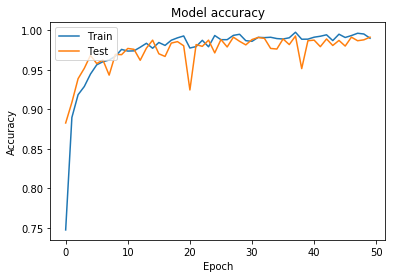

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
import numpy as np
from PIL import Image

def imgReturn(path):
  img = Image.open(path)
  img = img.resize((150,150))
  img = np.array(img).astype(np.float32)[None,:,:,:]
  if(img.shape[3]==3):
    img = np.reshape(img,[1,150,150,3])
    return img
  return img

In [0]:
path =  '/content/fruits-fresh-and-rotten-for-classification/dataset/train/freshapples'
for file in os.listdir(path):
  testImg = imgReturn(path+'/'+file)
  if(testImg.shape[3]==3):
    predict = inception_transfer.predict(testImg)
    print(predict)
    
  
  

In [0]:
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf

In [16]:
cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)
    
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/
!cp ../input/keras-pretrained-models/resnet50* ~/.keras/models/

print("Available Pretrained Models:\n")
!ls ~/.keras/models

cp: cannot stat '../input/keras-pretrained-models/*notop*': No such file or directory
cp: cannot stat '../input/keras-pretrained-models/imagenet_class_index.json': No such file or directory
cp: cannot stat '../input/keras-pretrained-models/resnet50*': No such file or directory
Available Pretrained Models:



In [17]:
inception_base = applications.ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = inception_base.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a fully connected output/classification layer
predictions = Dense(6, activation='softmax')(x)
# create the full network so we can train on it
inception_transfer = Model(inputs=inception_base.input, outputs=predictions)

W0829 19:55:53.609659 139802027734912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step


In [0]:
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [19]:
histTransf = inception_transfer.fit_generator(
    generator=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=5
)

Epoch 1/5
340/340 [==============================] - 188s 552ms/step - loss: 0.6796 - acc: 0.8006 - val_loss: 0.2033 - val_acc: 0.9565
Epoch 2/5
340/340 [==============================] - 178s 523ms/step - loss: 0.1567 - acc: 0.9659 - val_loss: 0.0853 - val_acc: 0.9842
Epoch 3/5
340/340 [==============================] - 178s 524ms/step - loss: 0.0842 - acc: 0.9830 - val_loss: 0.0539 - val_acc: 0.9902
Epoch 4/5
340/340 [==============================] - 177s 520ms/step - loss: 0.0574 - acc: 0.9885 - val_loss: 0.0372 - val_acc: 0.9940
Epoch 5/5
340/340 [==============================] - 177s 519ms/step - loss: 0.0423 - acc: 0.9928 - val_loss: 0.0296 - val_acc: 0.9955


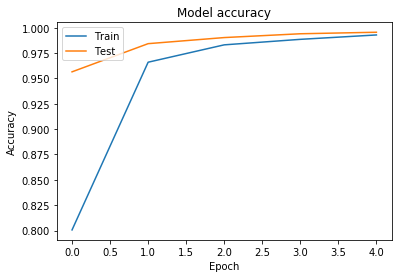

In [20]:
plt.plot(histTransf.history['acc'])
plt.plot(histTransf.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()